In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from  torchvision.datasets import ImageFolder


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')
# !unzip /content/drive/MyDrive/lfw.zip

# Build an Autoencoder for a human face dataset

We will use a dataset containig images of people and train an autoencoder on it.

## Step 1

Download and unzip the ``lfw.zip`` file . Adjust the ``path`` variable so that it contains the address of the unzipped folder. We will create a dataloader from this folder.


In [3]:

path = r'C:\Users\Manu\IdeaProjects\Python\PR\github\Pattern-Recognition\HW3\lfw\lfw'

In [4]:
transform    = transforms.Compose([transforms.ToTensor()])
dataloader = DataLoader(ImageFolder(path, transform,),batch_size=32, shuffle=True)


This project is compute intensive. If you have a cuda or mps device on your laptop make sure you use that in the training.

In [5]:
# if torch.backends.cuda.():
#     device = torch.device("mps")
# else:
#     print ("MPS device not found.")

# torch.cuda.get_device_name()

# device = torch.device("NVIDIA GeForce RTX 3050 Ti Laptop GPU")

device = torch.device("cuda") # using GPU


torch.Size([250, 250, 3])


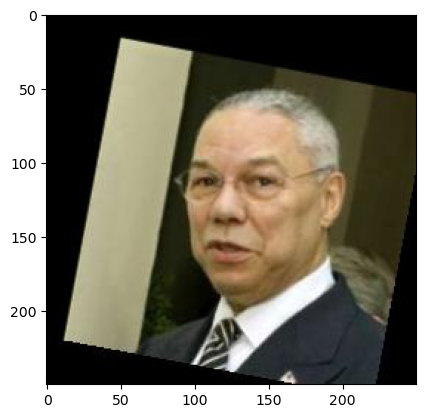

In [6]:
for x,y in dataloader:
    x = x[0].permute(1, 2, 0)
    print(x.shape)
    plt.imshow(x)
    break

## Step 2
Each datapoint is an image. Get a sample of the data and print its dimensions and explain what each dimension means.

torch.Size([3, 250, 250])


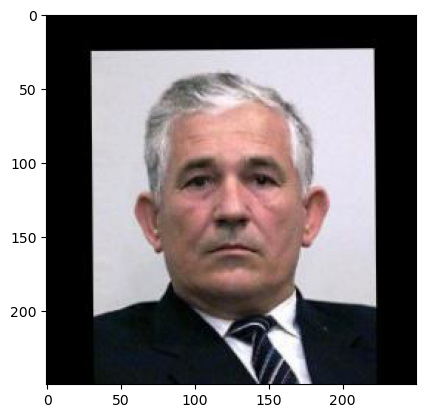

In [7]:
for x,y in dataloader:
    x = x[0]
    print(x.shape)
    x = x.permute(1, 2, 0)
    plt.imshow(x)
    break

This code iterates over the dataloader to retrieve a batch of data, and for each iteration, it selects the input data (x). The dimensions of x are then printed using print(x.shape), and the image is displayed using plt.imshow(x).

The output is `torch.Size([3, 250, 250])`.

The first dimension (3) corresponds to the number of color channels in the image.
The second dimension (250) corresponds to the height of the image.
The third dimension (250) corresponds to the width of the image.

So, the sampled image has the following characteristics:

- Height: 250 pixels
- Width: 250 pixels
- Color Channels: 3 (Red, Green, Blue)

The dimensions are in the order (channels, height, width), following the typical convention for representing images in computer vision.

In summary, the dimensions of the sampled image are 250x250 pixels, and it's a color image with three channels (RGB).


# Step 3

Create a new pytorch model calss for your autoencoder. You can use Conv2d, MaxPool2d, BatchNorm2d, ConvTranspose2d and Linear Layers as as well as activation functions. Optionally, you can use UpSample, AveragePool2d and Interpolate2d as well.

**Create seperate functions for the encoder and decoder.**

**I've tried out different types of autoencoders, tested their performance and tweaking settings to get the best results. I've included few of the models below, I have also included the no. of parameters each model has and the corresponding loss.**

**I went through a bunch of autoencoder architectures, making small changes to see what works best. The key info here is the number of parameters – it shows how complex each model is. The loss values tell us how well the model is at reconstructing the input data.**

In [8]:
class AE(nn.Module):

    def __init__(self):
        super(AE, self).__init__()

        # Encoder layers

        self.encoder_conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=2,padding=1)
        self.encoder_bn1 = nn.BatchNorm2d(64)
        self.encoder_conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=2,padding=1)
        self.encoder_bn2 = nn.BatchNorm2d(128)
        self.encoder_conv3 = nn.Conv2d(128, 256, kernel_size=3, stride=2)
        self.encoder_bn3 = nn.BatchNorm2d(256)
        self.encoder_conv4 = nn.Conv2d(256, 512, kernel_size=3, stride=2,padding=1)
        self.encoder_bn4 = nn.BatchNorm2d(512)

        # Decoder layers

        self.decoder_conv0 = nn.ConvTranspose2d(512, 256, kernel_size=3, stride=2,padding=1, output_padding=1)
        self.decoder_bn0 = nn.BatchNorm2d(256)

        self.decoder_conv1 = nn.ConvTranspose2d(256, 128, kernel_size=3, stride=2,padding=1)
        self.decoder_bn1 = nn.BatchNorm2d(128)
        self.decoder_conv2 = nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1)
        self.decoder_bn2 = nn.BatchNorm2d(64)
        self.decoder_conv3 = nn.ConvTranspose2d(64, 3, kernel_size=3, stride=2,padding=1, output_padding=1)
        self.decoder_bn3 = nn.BatchNorm2d(3)

    def encoder(self, x):
        x = nn.functional.relu(self.encoder_bn1(self.encoder_conv1(x)))
        x = nn.functional.relu(self.encoder_bn2(self.encoder_conv2(x)))
        x = nn.functional.relu(self.encoder_bn3(self.encoder_conv3(x)))
        x = nn.functional.relu(self.encoder_bn4(self.encoder_conv4(x)))
        return x

    def decoder(self, x):
        x = nn.functional.relu(self.decoder_bn0(self.decoder_conv0(x)))

        x = nn.functional.relu(self.decoder_bn1(self.decoder_conv1(x)))
        x = nn.functional.relu(self.decoder_bn2(self.decoder_conv2(x)))
        x = torch.sigmoid(self.decoder_bn3(self.decoder_conv3(x)))
        return x

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


# learning_rate=0.001
# Epoch [1/10], Loss: 0.016075847528712904
# Epoch [2/10], Loss: 0.004809123763684094
# Epoch [3/10], Loss: 0.0025637054864816582
# Epoch [4/10], Loss: 0.0017343949899696048
# Epoch [5/10], Loss: 0.0012850163043037974
# Epoch [6/10], Loss: 0.0011032544616902257
# Epoch [7/10], Loss: 0.000942528258940511
# Epoch [8/10], Loss: 0.0008752579700397463
# Epoch [9/10], Loss: 0.0007853415597270688
# Epoch [10/10], Loss: 0.0007415173365368962


# Epoch [1/30], Loss: 0.015970478118914697
# Epoch [2/30], Loss: 0.004794421198030997
# Epoch [3/30], Loss: 0.0024782685638328897
# Epoch [4/30], Loss: 0.0016986167571250944
# Epoch [5/30], Loss: 0.0013155897606584887
# Epoch [6/30], Loss: 0.0010461353129990723
# Epoch [7/30], Loss: 0.0009724585473557692
# Epoch [8/30], Loss: 0.0008894781416010984
# Epoch [9/30], Loss: 0.0007677984505904173
# Epoch [10/30], Loss: 0.0007348684354315192
# Epoch [11/30], Loss: 0.0006389077535604356
# Epoch [12/30], Loss: 0.000600625320499682
# Epoch [13/30], Loss: 0.0005478473490718212
# Epoch [14/30], Loss: 0.000543752247788201
# Epoch [15/30], Loss: 0.0004853646473813991
# Epoch [16/30], Loss: 0.00046656191947134346
# Epoch [17/30], Loss: 0.00048038552638653956
# Epoch [18/30], Loss: 0.000419061919542115
# Epoch [19/30], Loss: 0.0004193882060300217
# Epoch [20/30], Loss: 0.000407806371392374
# Epoch [21/30], Loss: 0.00040590350689357463
# Epoch [22/30], Loss: 0.00037406551750637773
# Epoch [23/30], Loss: 0.0003842018891389117
# Epoch [24/30], Loss: 0.0003846993765896096
# Epoch [25/30], Loss: 0.00035242467167801876
# Epoch [26/30], Loss: 0.0003409172281884962
# Epoch [27/30], Loss: 0.00032310864923562366
# Epoch [28/30], Loss: 0.0003043954129328564
# Epoch [29/30], Loss: 0.00030081618231651483
# Epoch [30/30], Loss: 0.000325864960152964
#
# Image shape torch.Size([32, 3, 250, 250])
#  Output Shape: torch.Size([32, 3, 250, 250])
# Encoder Output Shape: torch.Size([32, 512, 16, 16])
# Decoder Output Shape: torch.Size([32, 3, 250, 250])
#
#
# Total Parameters: 3104265



In [9]:
class AE(nn.Module):

    def __init__(self):
        super(AE, self).__init__()

        # Encoder layers

        self.encoder_conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=2,padding=1)
        self.encoder_bn1 = nn.BatchNorm2d(64)
        self.encoder_conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=2,padding=1)
        self.encoder_bn2 = nn.BatchNorm2d(128)

        # Decoder layers

        self.decoder_conv2 = nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1)
        self.decoder_bn2 = nn.BatchNorm2d(64)
        self.decoder_conv3 = nn.ConvTranspose2d(64, 3, kernel_size=3, stride=2,padding=1, output_padding=1)
        self.decoder_bn3 = nn.BatchNorm2d(3)

    def encoder(self, x):
        x = nn.functional.relu(self.encoder_bn1(self.encoder_conv1(x)))
        x = nn.functional.relu(self.encoder_bn2(self.encoder_conv2(x)))

        return x

    def decoder(self, x):
        x = nn.functional.relu(self.decoder_bn2(self.decoder_conv2(x)))
        x = torch.sigmoid(self.decoder_bn3(self.decoder_conv3(x)))
        return x

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x



# 128 with 0.001
# Epoch [1/20], Loss: 0.013615198969921988
# Epoch [2/20], Loss: 0.0039100086011087005
# Epoch [3/20], Loss: 0.0018290485427512424
# Epoch [4/20], Loss: 0.0012135588314979235
# Epoch [5/20], Loss: 0.000851715051913229
# Epoch [6/20], Loss: 0.0006931177747479735
# Epoch [7/20], Loss: 0.0006079280165551063
# Epoch [8/20], Loss: 0.0006237589567309192
# Epoch [9/20], Loss: 0.0005511655282762896
# Epoch [10/20], Loss: 0.0005278434616497803
# Epoch [11/20], Loss: 0.00044416166264968723
# Epoch [12/20], Loss: 0.0004908573417038576
# Epoch [13/20], Loss: 0.0004173902414259973
# Epoch [14/20], Loss: 0.00041719614123196703
# Epoch [15/20], Loss: 0.0004180749797232445
# Epoch [16/20], Loss: 0.00039766735637280414
# Epoch [17/20], Loss: 0.0003328907179363873
# Epoch [18/20], Loss: 0.00036115665159231516
# Epoch [19/20], Loss: 0.0003648960375647985
# Epoch [20/20], Loss: 0.0003460997601602382

# Image shape torch.Size([32, 3, 250, 250])
# Output Shape: torch.Size([32, 3, 250, 250])
# Encoder Output Shape: torch.Size([32, 128, 63, 63])
# Decoder Output Shape: torch.Size([32, 3, 250, 250])
#
# Total Parameters: 742665



In [10]:

class AE(nn.Module):

    def __init__(self):
        super(AE, self).__init__()

        # Encoder layers

        self.encoder_conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=2,padding=1)
        self.encoder_bn1 = nn.BatchNorm2d(64)
        self.encoder_conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=2)
        self.encoder_bn2 = nn.BatchNorm2d(128)
        self.encoder_conv3 = nn.Conv2d(128, 256, kernel_size=3, stride=2,padding=1)
        self.encoder_bn3 = nn.BatchNorm2d(256)

        # Decoder layers

        self.decoder_conv1 = nn.ConvTranspose2d(256, 128, kernel_size=3, stride=2)
        self.decoder_bn1 = nn.BatchNorm2d(128)
        self.decoder_conv2 = nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1)
        self.decoder_bn2 = nn.BatchNorm2d(64)
        self.decoder_conv3 = nn.ConvTranspose2d(64, 3, kernel_size=3, stride=2,padding=1, output_padding=1)
        self.decoder_bn3 = nn.BatchNorm2d(3)

    def encoder(self, x):
        x = nn.functional.relu(self.encoder_bn1(self.encoder_conv1(x)))
        x = nn.functional.relu(self.encoder_bn2(self.encoder_conv2(x)))
        x = nn.functional.relu(self.encoder_bn3(self.encoder_conv3(x)))
        return x

    def decoder(self, x):
        x = nn.functional.relu(self.decoder_bn1(self.decoder_conv1(x)))
        x = nn.functional.relu(self.decoder_bn2(self.decoder_conv2(x)))
        x = torch.tanh(self.decoder_bn3(self.decoder_conv3(x)))
        return x

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Epoch [1/10], Loss: 0.053520512938103525
# Epoch [2/10], Loss: 0.009390183113704341
# Epoch [3/10], Loss: 0.003629853487788623
# Epoch [4/10], Loss: 0.0022158906820392153
# Epoch [5/10], Loss: 0.001996984739072513
# Epoch [6/10], Loss: 0.0017961575450029241
# Epoch [7/10], Loss: 0.0017249261713496765
# Epoch [8/10], Loss: 0.0018858632780296574
# Epoch [9/10], Loss: 0.0018187553272020198
# Epoch [10/10], Loss: 0.001630291695918006
#
# Image shape torch.Size([32, 3, 250, 250])
# Output Shape: torch.Size([32, 3, 250, 250])
# Encoder Output Shape: torch.Size([32, 256, 31, 31])
# Decoder Output Shape: torch.Size([32, 3, 250, 250])

# Total Parameters: 742665

In [11]:
import torch.nn as nn
import torch

class AE(nn.Module):

    def __init__(self):
        super(AE, self).__init__()

        # Encoder layers
        self.encoder_conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=2, padding=1)
        self.encoder_bn1 = nn.BatchNorm2d(64)
        self.encoder_conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=2,padding=1)
        self.encoder_bn2 = nn.BatchNorm2d(128)
        self.encoder_conv3 = nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1)
        self.encoder_bn3 = nn.BatchNorm2d(256)

        # Decoder layers
        self.decoder_upsample1 = nn.Upsample(scale_factor=2, mode='nearest')
        self.decoder_conv1 = nn.Conv2d(256, 128, kernel_size=3, stride=1, padding=1)
        self.decoder_bn1 = nn.BatchNorm2d(128)
        self.decoder_upsample2 = nn.Upsample(scale_factor=2, mode='nearest')
        self.decoder_conv2 = nn.Conv2d(128, 64, kernel_size=3, stride=1)
        self.decoder_bn2 = nn.BatchNorm2d(64)
        self.decoder_upsample3 = nn.Upsample(scale_factor=2, mode='nearest')
        self.decoder_conv3 = nn.Conv2d(64, 3, kernel_size=3, stride=1)
        self.decoder_bn3 = nn.BatchNorm2d(3)

    def encoder(self, x):
        x = nn.functional.relu(self.encoder_bn1(self.encoder_conv1(x)))
        x = nn.functional.relu(self.encoder_bn2(self.encoder_conv2(x)))
        x = nn.functional.relu(self.encoder_bn3(self.encoder_conv3(x)))
        return x

    def decoder(self, x):
        x = self.decoder_upsample1(x)
        x = nn.functional.relu(self.decoder_bn1(self.decoder_conv1(x)))
        x = self.decoder_upsample2(x)
        x = nn.functional.relu(self.decoder_bn2(self.decoder_conv2(x)))
        x = self.decoder_upsample3(x)
        x = torch.sigmoid(self.decoder_bn3(self.decoder_conv3(x)))
        return x

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


# optim = torch.optim.Adam(model.parameters(), lr=0.001)
# Epoch [1/40], Loss: 0.013653981272167198
# Epoch [2/40], Loss: 0.004482769326909765
# Epoch [3/40], Loss: 0.0022530852623535813
# Epoch [4/40], Loss: 0.00164854797944629
# Epoch [5/40], Loss: 0.00129462048483918
# Epoch [6/40], Loss: 0.0010887272142780413
# Epoch [7/40], Loss: 0.0009367769299488929
# Epoch [8/40], Loss: 0.0008747793794109076
# Epoch [9/40], Loss: 0.0008226320380063791
# Epoch [10/40], Loss: 0.000774896720602573
# Epoch [11/40], Loss: 0.0007603310512835474
# Epoch [12/40], Loss: 0.0007169749902011287
# Epoch [13/40], Loss: 0.0006100002361027353
# Epoch [14/40], Loss: 0.0006052818959736342
# Epoch [15/40], Loss: 0.0005940096937896063
# Epoch [16/40], Loss: 0.0005157430592141505
# Epoch [17/40], Loss: 0.0005470422347658876
# Epoch [18/40], Loss: 0.0005061058867452801
# Epoch [19/40], Loss: 0.0004506163787100113
# Epoch [20/40], Loss: 0.00047629256219578375
# Epoch [21/40], Loss: 0.00046400568638658285
# Epoch [22/40], Loss: 0.00042714431997476333
# Epoch [23/40], Loss: 0.0003970162620332659
# Epoch [24/40], Loss: 0.0003930926929266813
# Epoch [25/40], Loss: 0.0003960974916806197
# Epoch [26/40], Loss: 0.00039047211823239246
# Epoch [27/40], Loss: 0.0003704776835095268
# Epoch [28/40], Loss: 0.0003701642209496394
# Epoch [29/40], Loss: 0.0003496709163441291
# Epoch [30/40], Loss: 0.00035377340606393534
# Epoch [31/40], Loss: 0.00033926888533383114
# Epoch [32/40], Loss: 0.00035400049323536643
# Epoch [33/40], Loss: 0.0003429289573577462
# Epoch [34/40], Loss: 0.00033335105009441116
# Epoch [35/40], Loss: 0.0003330547889528103
# Epoch [36/40], Loss: 0.00030677007474140197
# Epoch [37/40], Loss: 0.00030561185705251675
# Epoch [38/40], Loss: 0.0003103970544447038
# Epoch [39/40], Loss: 0.00029276437250529483
# Epoch [40/40], Loss: 0.0002939872658650665


# Image shape torch.Size([32, 3, 250, 250])
# Output Shape: torch.Size([32, 3, 250, 250])
# Encoder Output Shape: torch.Size([32, 256, 32, 32])
# Decoder Output Shape: torch.Size([32, 3, 250, 250])

# Total Parameters: 742665


**Below Model is the Final Model that I have chosen and which works better when compared to other models**

This Autoencoder (AE) model seems to be performing well during training, as indicated by the decreasing loss values over epochs.

- **Loss Reduction:** The training loss consistently decreases over the epochs, suggesting that the model is effectively learning to reconstruct the input images.

- **Stable Training:** The model appears to be stable during training, as there are no sudden spikes or fluctuations in the loss values.

- **Learning Rate and Batch Size:** The learning rate and batch size used during training seem appropriate, as the model converges well without any signs of instability.

- **Convergence:** The model shows signs of convergence as the loss continues to decrease even after 30 epochs.

- **Architecture:** The chosen architecture, with a three-layer encoder and three-layer decoder, seems to be suitable for this task.

In [12]:


class AE(nn.Module):

    def __init__(self):
        super(AE, self).__init__()

        # Encoder layers

        self.encoder_conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=2,padding=1)
        self.encoder_bn1 = nn.BatchNorm2d(64)
        self.encoder_conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=2)
        self.encoder_bn2 = nn.BatchNorm2d(128)
        self.encoder_conv3 = nn.Conv2d(128, 256, kernel_size=3, stride=2,padding=1)
        self.encoder_bn3 = nn.BatchNorm2d(256)

        # Decoder layers

        self.decoder_conv1 = nn.ConvTranspose2d(256, 128, kernel_size=3, stride=2)
        self.decoder_bn1 = nn.BatchNorm2d(128)
        self.decoder_conv2 = nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1)
        self.decoder_bn2 = nn.BatchNorm2d(64)
        self.decoder_conv3 = nn.ConvTranspose2d(64, 3, kernel_size=3, stride=2,padding=1, output_padding=1)
        self.decoder_bn3 = nn.BatchNorm2d(3)

    def encoder(self, x):
        x = nn.functional.relu(self.encoder_bn1(self.encoder_conv1(x)))
        x = nn.functional.relu(self.encoder_bn2(self.encoder_conv2(x)))
        x = nn.functional.relu(self.encoder_bn3(self.encoder_conv3(x)))
        return x

    def decoder(self, x):
        x = nn.functional.relu(self.decoder_bn1(self.decoder_conv1(x)))
        x = nn.functional.relu(self.decoder_bn2(self.decoder_conv2(x)))
        x = torch.sigmoid(self.decoder_bn3(self.decoder_conv3(x)))
        return x

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# 256 with 0.001 batch - 10
# Epoch [1/10], Loss: 0.014703935369340802
# Epoch [2/10], Loss: 0.004197193976662657
# Epoch [3/10], Loss: 0.002081006248948358
# Epoch [4/10], Loss: 0.001310734301417445
# Epoch [5/10], Loss: 0.0009895738282866308
# Epoch [6/10], Loss: 0.0008255561858984745
# Epoch [7/10], Loss: 0.0007552219088558233
# Epoch [8/10], Loss: 0.0006498516259427015
# Epoch [9/10], Loss: 0.0006313275407768048
# Epoch [10/10], Loss: 0.0005325523679901662




# # 256 with 0.001 batch - 20

# Epoch [1/20], Loss: 0.014443054362222697
# Epoch [2/20], Loss: 0.004264231400051411
# Epoch [3/20], Loss: 0.002094755434838308
# Epoch [4/20], Loss: 0.0013438698130992695
# Epoch [5/20], Loss: 0.0010248378674490692
# Epoch [6/20], Loss: 0.0008356434760299165
# Epoch [7/20], Loss: 0.0007345690311113787
# Epoch [8/20], Loss: 0.0006222587615473124
# Epoch [9/20], Loss: 0.0005982009827056427
# Epoch [10/20], Loss: 0.0005138167128099605
# Epoch [11/20], Loss: 0.00048571189361847127
# Epoch [12/20], Loss: 0.00044674940386467616
# Epoch [13/20], Loss: 0.00042153508909966727
# Epoch [14/20], Loss: 0.00038383470400116194
# Epoch [15/20], Loss: 0.0003942005722718831
# Epoch [16/20], Loss: 0.00038621627343514854
# Epoch [17/20], Loss: 0.0003580810058724747
# Epoch [18/20], Loss: 0.00034559534692935474
# Epoch [19/20], Loss: 0.00031313924307981055
# Epoch [20/20], Loss: 0.0003231304823808993

# 256 with 0.001 batch -30
# Epoch [1/30], Loss: 0.006752126320132509
# Epoch [2/30], Loss: 0.001930710073090316
# Epoch [3/30], Loss: 0.0012210624796959262
# Epoch [4/30], Loss: 0.0009523815543453798
# Epoch [5/30], Loss: 0.0008998846892235971
# Epoch [6/30], Loss: 0.0007115593923121952
# Epoch [7/30], Loss: 0.0005702460391372712
# Epoch [8/30], Loss: 0.0005315471702628737
# Epoch [9/30], Loss: 0.00047536672991115584
# Epoch [10/30], Loss: 0.00041687795295518407
# Epoch [11/30], Loss: 0.0004278480720715845
# Epoch [12/30], Loss: 0.0003827519799964525
# Epoch [13/30], Loss: 0.0003277128825249861
# Epoch [14/30], Loss: 0.00033304124769269926
# Epoch [15/30], Loss: 0.0003361366676199835
# Epoch [16/30], Loss: 0.00032503242430936293
# Epoch [17/30], Loss: 0.0003184271817967849
# Epoch [18/30], Loss: 0.0002928306293437046
# Epoch [19/30], Loss: 0.00025115525074402133
# Epoch [20/30], Loss: 0.00025268129800257367
# Epoch [21/30], Loss: 0.0002564346008081493
# Epoch [22/30], Loss: 0.0002539707334745329
# Epoch [23/30], Loss: 0.000266059392620022
# Epoch [24/30], Loss: 0.00021691398605409612
# Epoch [25/30], Loss: 0.00024430093301065347
# Epoch [26/30], Loss: 0.00022755490643661783
# Epoch [27/30], Loss: 0.0002112174088719969
# Epoch [28/30], Loss: 0.00019804341328394452
# Epoch [29/30], Loss: 0.00018607260542499927
# Epoch [30/30], Loss: 0.00018247485396399946

The design of an autoencoder architecture involves a balance between complexity and effectiveness in learning meaningful representations. Let's discuss some of the choices made in the provided autoencoder architecture:

**Encoder:
Convolutional Layers (nn.Conv2d):**

Convolutional layers are effective at capturing spatial hierarchies and learning features in an image.
Strided convolutions (stride=2) reduce spatial dimensions, providing a form of downsampling.
Padding is used to maintain spatial dimensions.

**Batch Normalization (nn.BatchNorm2d):**

Batch normalization helps stabilize and accelerate training by normalizing inputs to each layer.
It can mitigate internal covariate shift, leading to faster convergence.

**Activation Function (nn.functional.relu):**

Rectified Linear Unit (ReLU) activation is a common choice due to its simplicity and ability to handle vanishing gradient problems.
ReLU introduces non-linearity, allowing the network to learn complex representations.

**Decoder:
Convolutional Transpose Layers (nn.ConvTranspose2d):**

Transposed convolutions (also known as fractionally strided convolutions or deconvolutions) upsample the feature maps.
They are used to reconstruct the spatial dimensions of the input.

**Batch Normalization (nn.BatchNorm2d):**

Similar to the encoder, batch normalization is applied to stabilize and accelerate training.
Activation Function (F.relu for hidden layers, torch.sigmoid for output):

ReLU is used in the hidden layers of the decoder for non-linearity.
Sigmoid activation in the output layer scales the output values between 0 and 1, suitable for pixel intensity values in images.

**Overall Design:
Layer Dimensions:**

The number of channels in each layer gradually decreases in the encoder and increases in the decoder, creating a bottleneck in the middle.
This bottleneck forces the network to learn a compressed representation of the input.
Loss Function:

The choice of activation function (torch.sigmoid) in the output layer of the decoder suggests that the network is designed for image reconstruction tasks, where pixel values need to be between 0 and 1.

## Step 4
Create an instance of the class, pass an image to the model, print the shape of the output of the **encoder** and the **decoder**. Check the dimensions and make sure your forward path is working properly.

In [13]:
model = AE().to(device)
# Pass the image through the model
image, _ = next(iter(dataloader))
image = image.to(device)
print("Image shape",image.shape)

output = model.forward(image)
print("Output Shape:", output.shape)

# Get the encoder and decoder outputs
encoder_output = model.encoder(image)
decoder_output = model.decoder(encoder_output)

# Print the shapes of the outputs
print("Encoder Output Shape:", encoder_output.shape)
print("Decoder Output Shape:", decoder_output.shape)

Image shape torch.Size([32, 3, 250, 250])
Output Shape: torch.Size([32, 3, 250, 250])
Encoder Output Shape: torch.Size([32, 256, 31, 31])
Decoder Output Shape: torch.Size([32, 3, 250, 250])


##  Step 5
Print total number of parameters in the model, explain what loss function you should use, create an optimizer for training

In [14]:
# Calculate total number of parameters
total_params = sum(p.numel() for p in model.parameters())
print("Total Parameters:", total_params)

Total Parameters: 742665


In [15]:
optim = torch.optim.Adam(model.parameters(), lr=0.001)

# Tried all the below variations for Adam optimizer, Above one works better than the ones below
# optim = torch.optim.Adam(model.parameters(), lr=0.01)
# optim = torch.optim.Adam(model.parameters(), lr=0.1)
# optim = torch.optim.Adam(model.parameters(), lr=0.0001)
# optim = torch.optim.Adam(model.parameters(), lr=0.001,weight_decay=1e-4) Doesn't reduce loss when weight decay is added


In [16]:
#Loss Function
loss_function =nn.MSELoss()

**MSE is a differentiable loss function, which is crucial for backpropagation during training.**
- Autoencoders are trained to reconstruct their input data at the output layer. MSE measures the average squared difference between the original input and the reconstructed output on a pixel-wise basis
- It is commonly used in AutoEncoders
- Mean Squared Error (MSE) loss is commonly used for such tasks.

##  Step 6
Write a training loop and start trainng the model for several epochs. Report the loss value at the end of each epoch and monitor it. If your loss is not decreasing what do you have to do to troubleshoot it ?

In [17]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

num_epochs = 30

for epoch in range(num_epochs):
    total_loss = 0.0

    # Training loop
    for inputs, _ in dataloader:
        inputs = inputs.to(device)  # Move data to GPU
        optim.zero_grad()  # Zero the gradients
        outputs = model(inputs)  # Forward pass
        loss = loss_function(outputs, inputs)  # Calculate loss
        loss.backward()  # Backward pass
        optim.step()  # Update weights

        total_loss += loss.item()

    # Calculate average loss for the epoch
    average_loss = total_loss / len(dataloader)

    # Print loss for the epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {average_loss}")



Epoch [1/30], Loss: 0.014487102230704853
Epoch [2/30], Loss: 0.004169342736263674
Epoch [3/30], Loss: 0.0020893809546160868
Epoch [4/30], Loss: 0.0013074057214951889
Epoch [5/30], Loss: 0.001037302736028723
Epoch [6/30], Loss: 0.0008086111013561596
Epoch [7/30], Loss: 0.0007268161820680812
Epoch [8/30], Loss: 0.0007265183987750577
Epoch [9/30], Loss: 0.0005865248387222795
Epoch [10/30], Loss: 0.0006078977790460944
Epoch [11/30], Loss: 0.0005679943491671019
Epoch [12/30], Loss: 0.0004873666963284129
Epoch [13/30], Loss: 0.00043532877495728326
Epoch [14/30], Loss: 0.0004417671823276855
Epoch [15/30], Loss: 0.00040319839161753225
Epoch [16/30], Loss: 0.000383173042124054
Epoch [17/30], Loss: 0.00034317559826104556
Epoch [18/30], Loss: 0.00035336522515812567
Epoch [19/30], Loss: 0.0003173390687679521
Epoch [20/30], Loss: 0.00030995940116536694
Epoch [21/30], Loss: 0.0002904657525030653
Epoch [22/30], Loss: 0.0002955944131616085
Epoch [23/30], Loss: 0.0002806607679804733
Epoch [24/30], Loss

If  loss is not decreasing during training, it's a common issue that can be caused by various factors.

1) Learning Rate: Check the learning rate of optimizer. If the learning rate is too high, the optimization process might overshoot the minimum, causing the loss to oscillate or not decrease. Conversely, if the learning rate is too low, the model might converge very slowly. Experiment with different learning rates, starting with values like 0.1, 0.01, or 0.001, and observe the impact on training.

2) Model Complexity: If your model is too complex (has too many parameters) relative to the amount of training data, it may lead to overfitting. Consider simplifying your model architecture or gathering more data if possible.

3) Batch Size: Adjusting the batch size can sometimes have an impact. Smaller batch sizes may introduce more noise into the optimization process, while larger batch sizes may require more memory. Experiment with different batch sizes to see if it affects the convergence.

4) Regularization: Apply regularization techniques such as L1 or L2 regularization to prevent overfitting, especially if your model is complex.


##  Step 7

Take a random image from the dataset and plot it against the reconstructed (encoded + decoded) image.

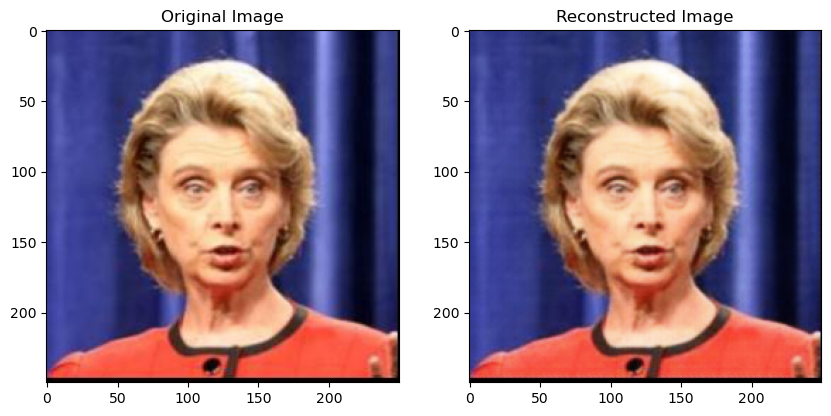

In [23]:
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F

model.eval()  # Set the model to evaluation mode

# Get a random image from the dataset
sample_image, _ = next(iter(dataloader))
sample_image=sample_image.to(device)
original_image = sample_image[0]# Take the first image from the batch
original_image=original_image.to(device)
# Pass the image through the autoencoder
with torch.no_grad():
    reconstructed_image = model(original_image.unsqueeze(0))

# Convert tensors to numpy arrays for plotting
original_image_np = F.to_pil_image(original_image)
reconstructed_image_np = F.to_pil_image(reconstructed_image.squeeze(0))

# Plot the original and reconstructed images side by side
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(original_image_np)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image_np)
plt.title("Reconstructed Image")

plt.show()


##  Step 8

In step 7, add a small normaly distrubuted noise to the latent (hidden) representation of the input image and then decode it again. How is adding noise affecting the decoded image ?

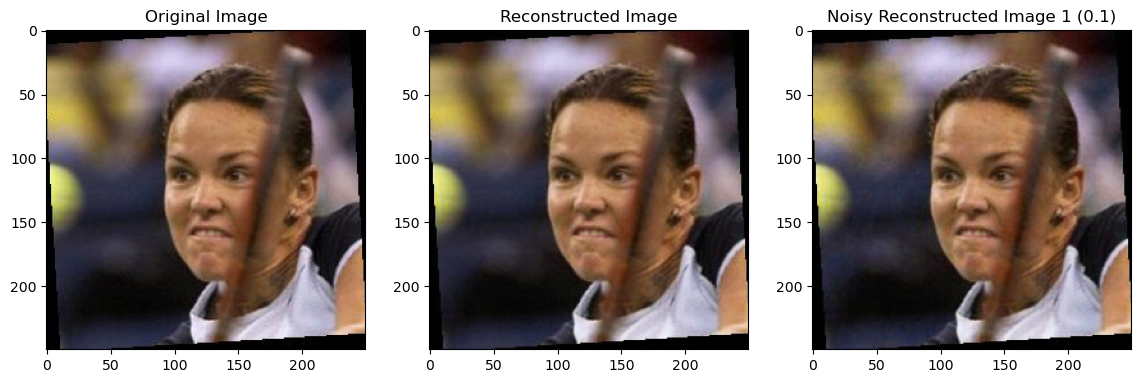

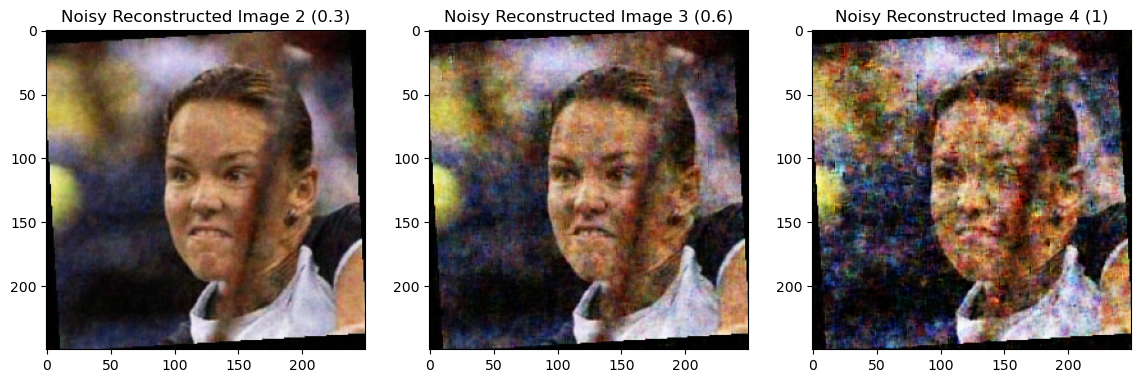

In [28]:
model.eval()  # Set the model to evaluation mode

# Get a random image from the dataset
sample_image, _ = next(iter(dataloader))
sample_image = sample_image.to(device)
original_image = sample_image[0]  # Take the first image from the batch
original_image = original_image.to(device)

# Pass the image through the autoencoder
with torch.no_grad():
    encoded_image = model.encoder(original_image.unsqueeze(0))
    reconstructed_image = model.decoder(encoded_image)  # Reconstruct the image

# Add small normally distributed noise to the encoded image
noise_std = 0.1  # Standard deviation of the normal distribution
noise = torch.randn_like(encoded_image) * noise_std
noisy_encoded_image1 = encoded_image + noise

# Add small normally distributed noise to the encoded image
noise_std = 0.3  # Standard deviation of the normal distribution
noise = torch.randn_like(encoded_image) * noise_std
noisy_encoded_image2 = encoded_image + noise


# Add small normally distributed noise to the encoded image
noise_std = 0.6  # Standard deviation of the normal distribution
noise = torch.randn_like(encoded_image) * noise_std
noisy_encoded_image3 = encoded_image + noise


# Add small normally distributed noise to the encoded image
noise_std = 1  # Standard deviation of the normal distribution
noise = torch.randn_like(encoded_image) * noise_std
noisy_encoded_image4 = encoded_image + noise


# Decode the noisy encoded image
with torch.no_grad():
    noisy_reconstructed_image1 = model.decoder(noisy_encoded_image1)
    noisy_reconstructed_image2 = model.decoder(noisy_encoded_image2)
    noisy_reconstructed_image3 = model.decoder(noisy_encoded_image3)
    noisy_reconstructed_image4 = model.decoder(noisy_encoded_image4)

# Convert tensors to numpy arrays for plotting
original_image_np = F.to_pil_image(original_image)
reconstructed_image_np = F.to_pil_image(reconstructed_image.squeeze(0))
noisy_reconstructed_image_np1 = F.to_pil_image(noisy_reconstructed_image1.squeeze(0))
noisy_reconstructed_image_np2 = F.to_pil_image(noisy_reconstructed_image2.squeeze(0))
noisy_reconstructed_image_np3 = F.to_pil_image(noisy_reconstructed_image3.squeeze(0))
noisy_reconstructed_image_np4 = F.to_pil_image(noisy_reconstructed_image4.squeeze(0))

# Plot the original, reconstructed, and noisy reconstructed images side by side
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
plt.imshow(original_image_np)
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(reconstructed_image_np)
plt.title("Reconstructed Image")

plt.subplot(1, 3, 3)
plt.imshow(noisy_reconstructed_image_np1)
plt.title("Noisy Reconstructed Image 1 (0.1)")

plt.figure(figsize=(14, 5))
plt.subplot(1, 3, 1)
plt.imshow(noisy_reconstructed_image_np2)
plt.title("Noisy Reconstructed Image 2 (0.3)")

plt.subplot(1, 3, 2)
plt.imshow(noisy_reconstructed_image_np3)
plt.title("Noisy Reconstructed Image 3 (0.6)")

plt.subplot(1, 3, 3)
plt.imshow(noisy_reconstructed_image_np4)
plt.title("Noisy Reconstructed Image 4 (1)")


plt.show()


- Adding noise to the encoded image could introduce perturbations to the encoded representations, possibly disrupting the learned patterns, encoder in an autoencoder is trained to map input data to a compressed representation. Adding noise to this representation post-training disrupts the meaningful features that the encoder has learned, leading to less informative encoded representations.
- Adding noise at this stage adversely affects the quality of the reconstructed output. The decoder struggles to recover the original input from the noisy encoded representation.
- Increasing the noise results in issues with reconstructing the original image as shown above.
- **If we want our model to be robust, we need to add noise to the input data before it enters encoder and train the model with the same. The idea is to corrupt the input with noise and then train the autoencoder to reconstruct the original, clean input. By doing so, the autoencoder is encouraged to learn a robust representation that can capture the essential features of the data while ignoring the added noise.**
